
## Welcome

This is material for the **Directed Acyclical Graphs** chapter in Scott Cunningham's book, [Causal Inference: The Mixtape.](https://mixtape.scunning.com/)


In [4]:
import Pkg
Pkg.add("RegressionTables")

   Resolving package versions...
   Installed GroupedArrays ───── v0.3.1
   Installed Vcov ────────────── v0.5.0
   Installed RegressionTables ── v0.5.4
   Installed FixedEffectModels ─ v1.6.5
   Installed FixedEffects ────── v2.1.0
    Updating `C:\Users\Roberto\.julia\environments\v1.7\Project.toml`
  [d519eb52] + RegressionTables v0.5.4
    Updating `C:\Users\Roberto\.julia\environments\v1.7\Manifest.toml`
  [9d5cd8c9] + FixedEffectModels v1.6.5
  [c8885935] + FixedEffects v2.1.0
  [6407cd72] + GroupedArrays v0.3.1
  [d519eb52] + RegressionTables v0.5.4
  [ec2bfdc2] + Vcov v0.5.0
Precompiling project...
  ✓ GroupedArrays
  ✓ FixedEffects
  ✓ Vcov
  ✓ FixedEffectModels
  ✓ RegressionTables
  5 dependencies successfully precompiled in 11 seconds (196 already precompiled)


In [1]:
using Distributions, DataFrames, GLM, StatsModels, LinearAlgebra, GLM, Statistics, Random, RegressionTables, Plots

In [2]:
female = float(ifelse.(rand(10000) .>= 0.5, 1, 0))
ability = randn(10000)
discrimination = female
occupation = ones(Float64, 10000)  + 2*ability + 0*female - 2*discrimination + randn(10000)
wage = ones(Float64, 10000) - 1*discrimination + 1*occupation + 2*ability + randn(10000)

10000-element Vector{Float64}:
  4.025504233792994
 -3.473025346301307
  3.7892797186717906
 -0.662506426882779
  3.6074566421557313
 -0.15698072523547418
  0.8930167706912691
 -0.912927270727756
 -1.7407143013690076
 -0.479037964993951
  2.6364185386729333
  7.0422875643808265
  4.4852734235470635
  ⋮
  0.6521220307609732
  7.302574042298292
 -1.8675063717374485
 -0.1618783042797134
 -8.50551077667584
  3.769728060732138
  0.05452168016605996
  3.6523748222776082
 -2.22795151650701
  1.015371789601733
 -3.6134184455702685
  2.3864089810776337

In [3]:
tb = DataFrame(female = female, ability = ability, discrimination = discrimination,
                occupation = occupation, wage = wage)

,female,ability,discrimination,occupation,wage
,Float64,Float64,Float64,Float64,Float64
1,0.0,-0.061452,0.0,2.34586,4.0255
2,0.0,-1.69821,0.0,-2.5737,-3.47303
3,1.0,1.75815,1.0,1.66377,3.78928
4,1.0,0.376448,1.0,-0.904256,-0.662506
5,0.0,-0.0851702,0.0,1.90415,3.60746
6,1.0,0.0368318,1.0,-0.538841,-0.156981
7,1.0,0.188408,1.0,-0.609089,0.893017
8,0.0,-0.910038,0.0,-2.10372,-0.912927
9,0.0,-0.946576,0.0,-0.479469,-1.74071


In [4]:
lm_1 = lm(@formula(wage ~ female), tb)

lm_2 = lm(@formula(wage ~ female + occupation), tb)

lm_3 = lm(@formula(wage ~ female + occupation + ability), tb)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

wage ~ 1 + female + occupation + ability

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)   1.01801    0.0176979   57.52    <1e-99   0.983317   1.0527
female       -1.01068    0.029035   -34.81    <1e-99  -1.0676    -0.953769
occupation    0.994237   0.0101611   97.85    <1e-99   0.974319   1.01416
ability       2.02038    0.0225681   89.52    <1e-99   1.97614    2.06462
──────────────────────────────────────────────────────────────────────────

In [5]:
regtable(lm_1 , lm_2,  lm_3, renderSettings = asciiOutput(), estimformat = "%02.3f")


----------------------------------------------
                            wage              
              --------------------------------
                    (1)        (2)         (3)
----------------------------------------------
(Intercept)    1.980***   0.189***    1.018***
                (0.060)    (0.020)     (0.018)
female        -3.050***   0.660***   -1.011***
                (0.085)    (0.030)     (0.029)
occupation                1.808***    0.994***
                           (0.006)     (0.010)
ability                               2.020***
                                       (0.023)
----------------------------------------------
Estimator           OLS        OLS         OLS
----------------------------------------------
N                10,000     10,000      10,000
R2                0.115      0.909       0.950
----------------------------------------------




#### QUESTIONS
- What is the true direct effect of discrimination on wages?  
- Explain the channels by which discrimination impacts wages.  
- What makes occupation a collider?
- What controls are necessary to eliminate this collider bias?



## Movie Star

In [65]:
Random.seed!(3444)

TaskLocalRNG()

In [66]:
beauty = randn(2500)
talent = randn(2500)
score = 1*beauty .+ 1*talent
c85 = quantile(score, 0.85)
star = ifelse.(score .> c85, 1, 0)

2500-element Vector{Int64}:
 0
 0
 0
 1
 0
 0
 0
 1
 0
 0
 0
 0
 0
 ⋮
 1
 0
 0
 0
 0
 0
 0
 0
 0
 0
 1
 0

In [67]:
star_is_born = DataFrame(beauty = beauty, talent = talent, score = sscore,
                c85  = c85 , star = star)

,beauty,talent,score,c85,star
,Float64,Float64,Float64,Float64,Int64
1,-0.770595,-0.465246,-1.23584,1.4919,0
2,0.197719,1.14721,1.34493,1.4919,0
3,-0.955798,-0.489467,-1.44527,1.4919,0
4,1.2127,1.01091,2.22362,1.4919,1
5,1.61381,-0.161303,1.45251,1.4919,0
6,-0.898607,-0.0478411,-0.946448,1.4919,0
7,0.743142,-1.5643,-0.821158,1.4919,0
8,0.231461,2.04665,2.27811,1.4919,1
9,0.539819,-0.850761,-0.310942,1.4919,0


## 1. Full Sample

In [68]:
lm_1 = lm(@formula(talent ~ beauty), star_is_born)

regtable(lm_1 , renderSettings = asciiOutput(), estimformat = "%02.3f")


---------------------
               talent
              -------
                  (1)
---------------------
(Intercept)     0.028
              (0.020)
beauty          0.018
              (0.020)
---------------------
Estimator         OLS
---------------------
N               2,500
R2              0.000
---------------------




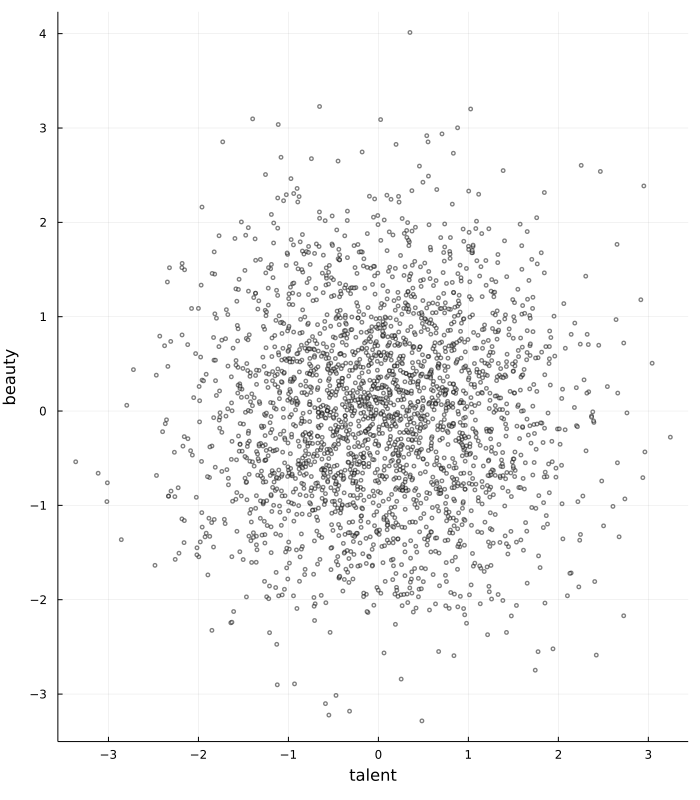

In [69]:
scatter(talent, beauty,markersize=2,alpha=.5,legend=false, seriescolor=:white)
plot!(size=(700,800), xtick = -4:4, ytick = -4:4, xlabel = "talent", ylabel = "beauty")

## 2. Conditional on Being a Star

In [70]:
star_is_born1 = filter(row -> row.star == 1.0, star_is_born)

,beauty,talent,score,c85,star
,Float64,Float64,Float64,Float64,Int64
1,1.2127,1.01091,2.22362,1.4919,1
2,0.231461,2.04665,2.27811,1.4919,1
3,0.667291,1.09112,1.75842,1.4919,1
4,0.999331,1.50394,2.50327,1.4919,1
5,3.00206,0.880095,3.88215,1.4919,1
6,0.503561,1.06747,1.57103,1.4919,1
7,2.01212,1.09044,3.10256,1.4919,1
8,0.771569,1.49891,2.27048,1.4919,1
9,0.931288,0.92292,1.85421,1.4919,1


In [71]:
star_is_born1 = filter(row -> row.star == 1.0, star_is_born)

lm_2 = lm(@formula(talent ~ beauty), star_is_born1 )

regtable(lm_2 , renderSettings = asciiOutput(), estimformat = "%02.3f")


-----------------------
                talent 
              ---------
                    (1)
-----------------------
(Intercept)    1.826***
                (0.050)
beauty        -0.612***
                (0.037)
-----------------------
Estimator           OLS
-----------------------
N                   375
R2                0.427
-----------------------




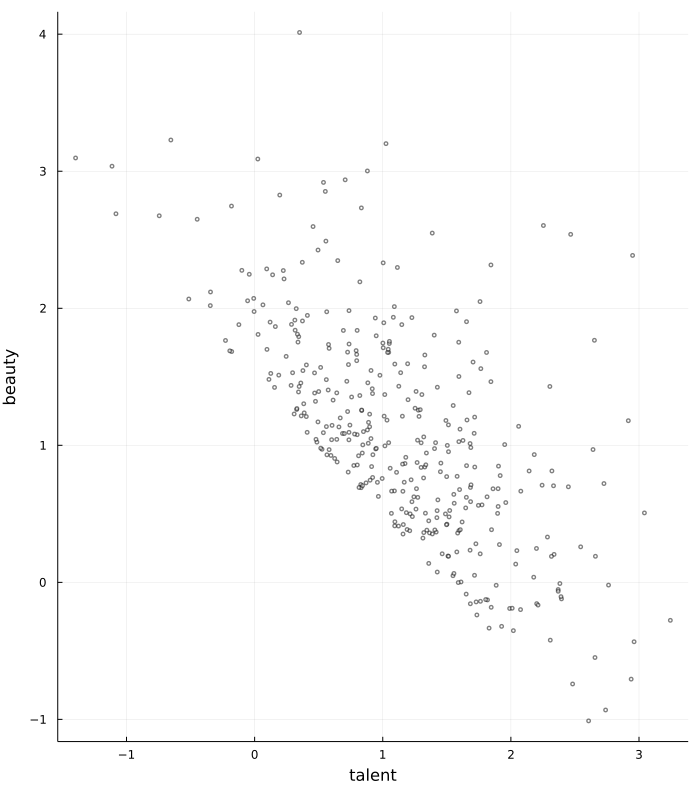

In [72]:
scatter(star_is_born1[!,:talent], star_is_born1[!,:beauty],markersize=2,alpha=.5,legend=false, seriescolor=:white, )

plot!(size=(700,800), xtick = -4:4, ytick = -4:4, xlabel = "talent", ylabel = "beauty")



## Conditional on Not Being a Star

In [73]:
star_is_born2 = filter(row -> row.star == 0.0, star_is_born)

lm_3 = lm(@formula(talent ~ beauty), star_is_born2)

regtable(lm_3 , renderSettings = asciiOutput(), estimformat = "%02.3f")


-----------------------
                talent 
              ---------
                    (1)
-----------------------
(Intercept)   -0.216***
                (0.020)
beauty        -0.204***
                (0.021)
-----------------------
Estimator           OLS
-----------------------
N                 2,125
R2                0.042
-----------------------




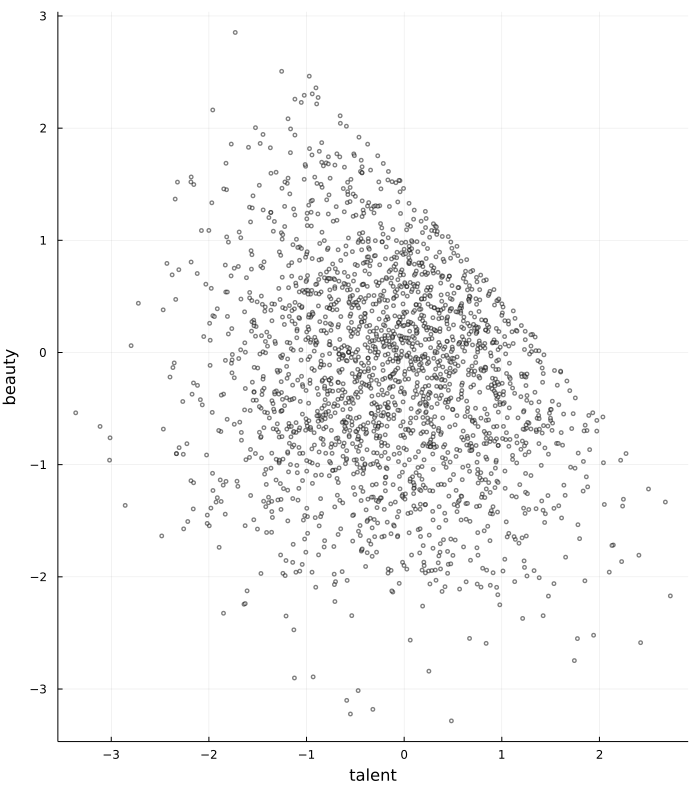

In [74]:
scatter(star_is_born2[!,:talent], star_is_born2[!,:beauty], markersize=2,alpha=.5,legend=false, seriescolor=:white)
plot!(size=(700,800), xtick = -4:4, ytick = -4:4, xlabel = "talent", ylabel = "beauty")


#### QUESTIONS
- What is the correlation between talent and beauty among stars?  Non-stars?
- But what is the correlation between talent and beauty in the population?

# References

https://www.geeksforgeeks.org/julia-dataframes/